<a href="https://colab.research.google.com/github/mohmaed7777/prediction-Houses-price-with-linear-Regression/blob/main/Boston%20houses%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

ZN: 
proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS:
 proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX:
 nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124
RM:
 average number of rooms per dwelling
AGE:
 proportion of owner-occupied units built prior to 1940
DIS:
 weighted distances to ﬁve Boston employment centers
RAD:
 index of accessibility to radial highways
TAX:
 full-value property-tax rate per $10,000
PTRATIO:
 pupil-teacher ratio by town 12. B:
  1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT:
   % lower status of the population
MEDV:
 Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
%pylab inline
%config InlineBackend.figure_formats=['retina']
sns.set()
%matplotlib inline 
print('Setup complete!!')

Populating the interactive namespace from numpy and matplotlib
Setup complete!!


In [4]:
# Load the data : 
df = pd.read_csv('/content/boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [7]:
df.shape

(506, 14)

In [8]:
# Dealing with the missing  values : 
missing_data = df.isnull().sum()
missing_data[:15]

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Variable Transformation & Log transformation: 
# Create a list of float columns to check for skewing: 
num_cols = df.select_dtypes('number').columns
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[num_cols].skew()
# showing the skewed columns
skew_cols  = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
ptratio   -0.802325
black     -2.890374
dtype: float64

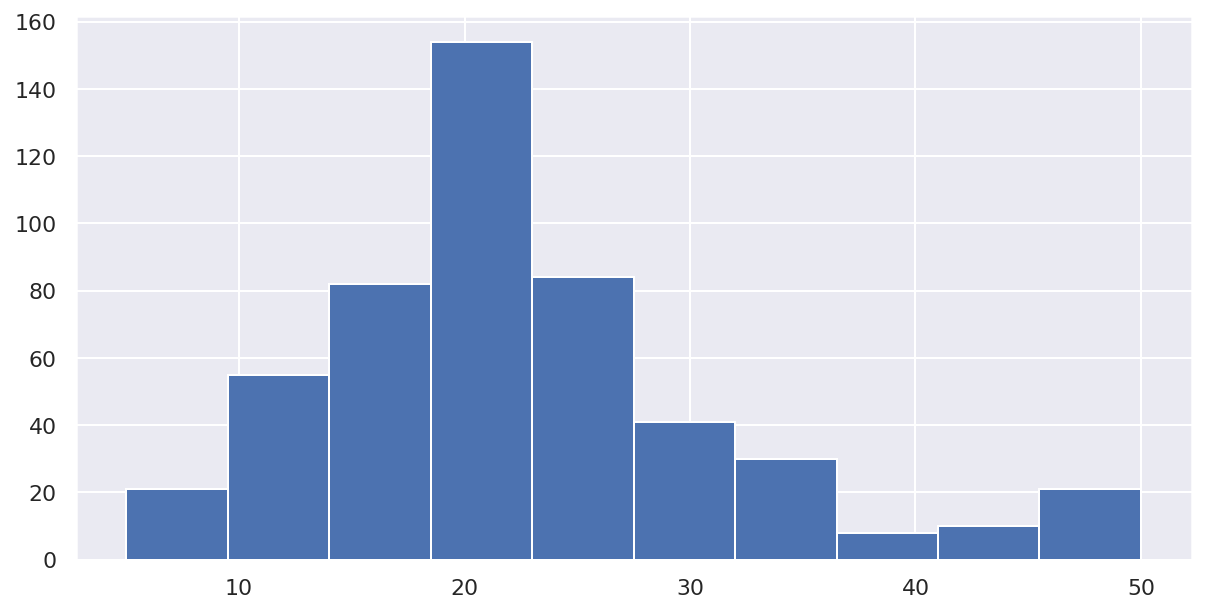

In [18]:
df['medv'].hist();

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Value'),
 Text(0.5, 1.0, 'after np.log1p')]

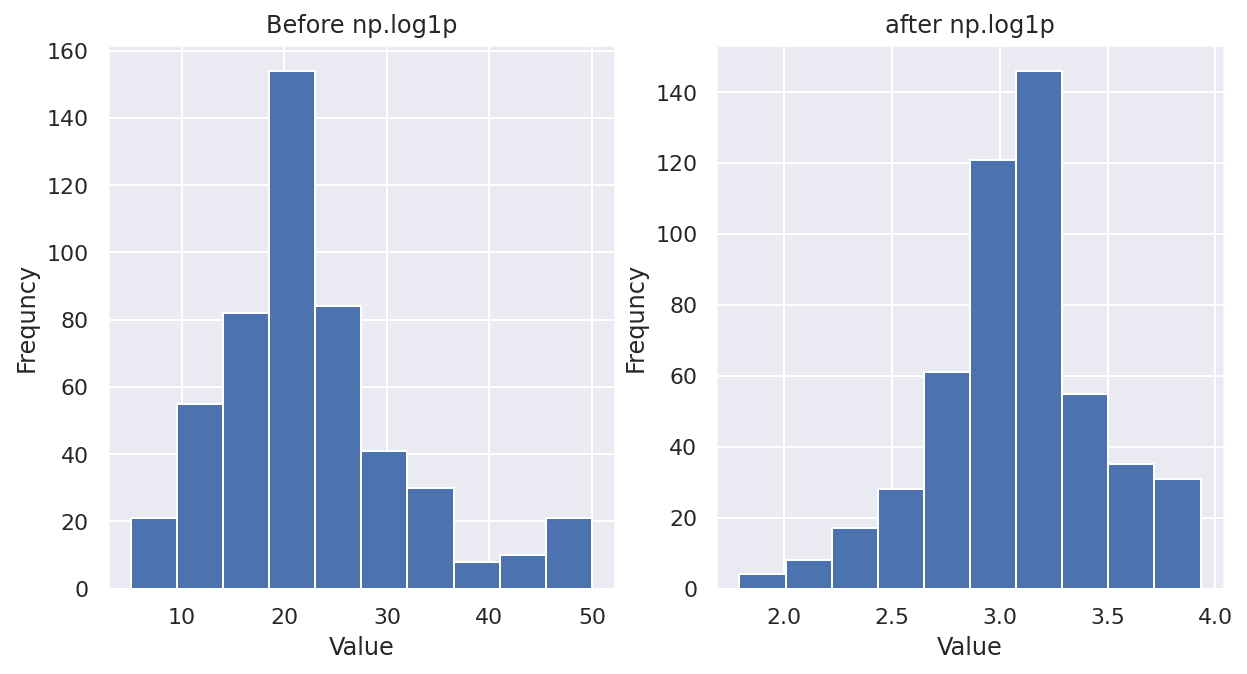

In [21]:
# Lets look at what happens to one of these features, when we apply np.log1p visually : 
# choose the filed: 
field = 'medv'
# Create two subplots & a figure using matplotlib : 
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(10,5))
# Create a histogram on the "ax_before" subplot
df[field].hist(ax = ax_before)
# Apply a log transformation (numpy syntax) to this column:
df[field].apply(np.log1p).hist(ax = ax_after)
# Formatting the titles : 
ax_before.set(title='Before np.log1p',
              ylabel='Frequncy',
              xlabel='Value')
ax_after.set(title='after np.log1p',
              ylabel='Frequncy',
              xlabel='Value')

In [22]:
# perform the skew transformation : 
for col in skew_cols.index.values:
  if col == 'medv':
    continue
  df[col] = df[col].apply(np.log1p)  

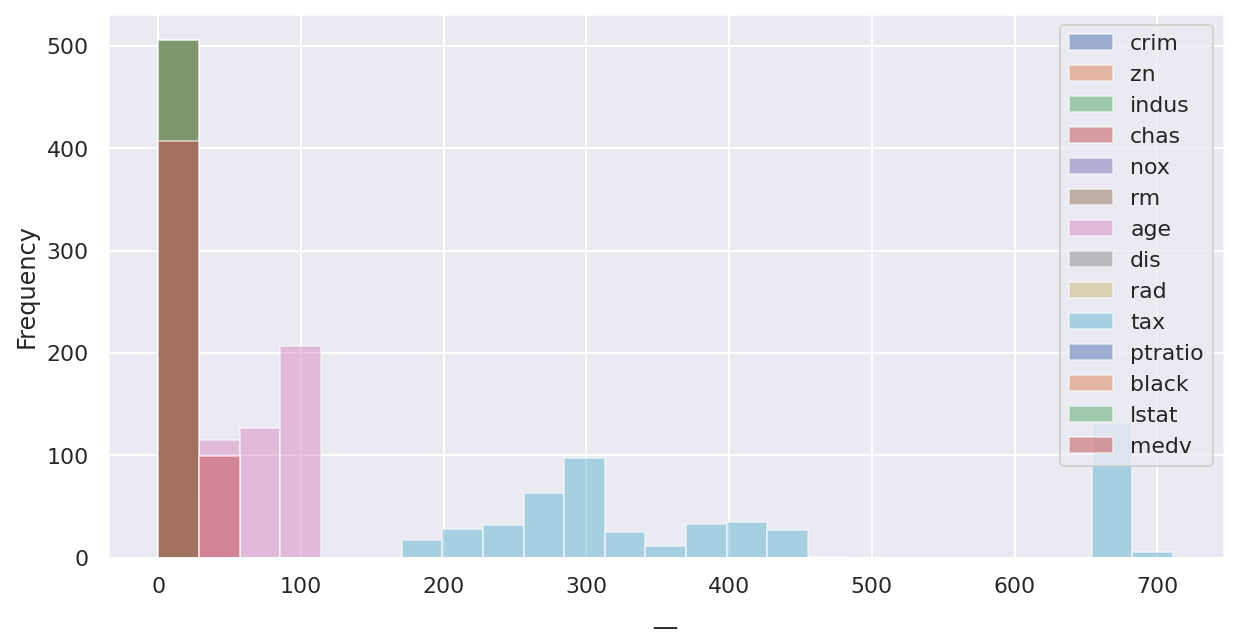

In [24]:
# Create a histogram for each freature overlayed: 
sns.set_context('notebook')
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('__');

In [27]:
# Create our model : 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [41]:
# Create x and y: 
y = df['medv']

x = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]


In [42]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [43]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.006300,2.944439,2.31,0.0,0.538,6.575,65.2,1.627278,0.693147,296.0,2.791165,5.986201,1.788421
1,0.026944,0.000000,7.07,0.0,0.469,6.421,78.9,1.786261,1.098612,242.0,2.933857,5.986201,2.316488
2,0.026924,0.000000,7.07,0.0,0.469,7.185,61.1,1.786261,1.098612,242.0,2.933857,5.975919,1.615420
3,0.031857,0.000000,2.18,0.0,0.458,6.998,45.8,1.954757,1.386294,222.0,2.980619,5.980479,1.371181
4,0.066770,0.000000,2.18,0.0,0.458,7.147,54.2,1.954757,1.386294,222.0,2.980619,5.986201,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.000000,11.93,0.0,0.573,6.593,69.1,1.246630,0.693147,273.0,3.091042,5.973784,2.367436
502,0.044275,0.000000,11.93,0.0,0.573,6.120,76.7,1.190127,0.693147,273.0,3.091042,5.986201,2.310553
503,0.058986,0.000000,11.93,0.0,0.573,6.976,91.0,1.152943,0.693147,273.0,3.091042,5.986201,1.893112
504,0.103991,0.000000,11.93,0.0,0.573,6.794,89.3,1.220505,0.693147,273.0,3.091042,5.977492,2.012233
